P9: Implementation of Image-filtering techniques<br>
P8: Implementation of metrics for Noise measures in Image quality<br>
Identify necessary images to perform the following using only OPENCV library.<br>
1. Sharpen and Blur the input image using cv.filter2D() and display the output for any 5 user defined kernels.
2. Restore the noisy Input Image using Noise Removal Techniques. Explore and applyten different filtering techniques for noise removal
● Mean Filtering<br>
● Gaussian Filter<br>
● Sobel Filter(all 4)<br>
● Median Filter<br>
● Laplacian Filter<br>
● Bilateral Filter<br>
● Non-Local Means Filtering<br>
● And any other three filtering techniques of your choice.<br>
Identify and justify the most suitable filtering technique for effectively removing noise from the noisy Input Image.<br>
3. Measure the quality of the best output image using any 2 different Image quality measures and give your interpretation.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

Q1. Sharpen and Blur the input image using cv.filter2D() and display the output for any 5 user defined kernels.

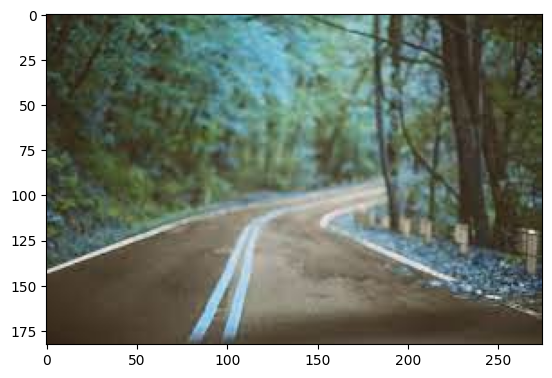

In [2]:
image = cv.imread('imageblr.jpg')
plt.imshow(image)

In [3]:
#create the sharpening image
#kernel = np.ones((3,3), np.float32)
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
blur_kernel = np.ones((5,5), np.float32)/30
#sharpen the image by applying filter2D() function
sharpened_image = cv.filter2D(src = image, ddepth=-1, kernel=sharpen_kernel)
blur_image = cv.filter2D(image,-1, blur_kernel)


In [7]:
kernel_sobel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_image = cv.filter2D(image, -1, kernel_sobel)

emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
emboss_image = cv.filter2D(image, -1, emboss_kernel)

identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
identity_image = cv.filter2D(image, -1,identity_kernel)

edge_detection = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
edge_image = cv.filter2D(image, -1, edge_detection)

kernel_custom = np.array([[1,0,0],[0,1,0],[0,0,1]])
custom_image = cv.filter2D(image, -1, kernel_custom)

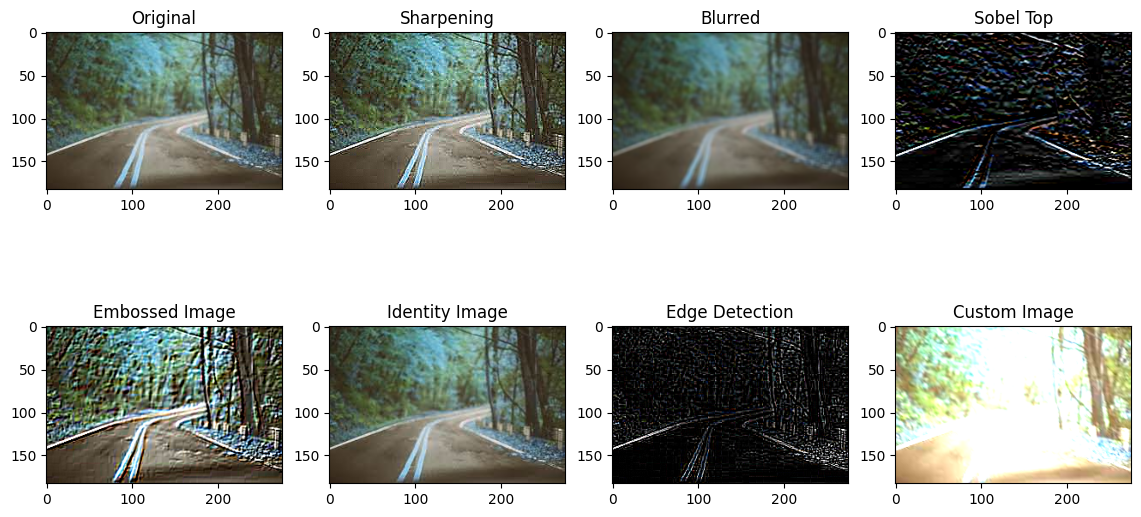

In [35]:
plt.figure(figsize=(14, 14))
#plot the sharpened image
plt.subplot(241), plt.title("Original"),plt.imshow(image)
plt.subplot(242), plt.title("Sharpening"),plt.imshow(sharpened_image)
plt.subplot(243), plt.title("Blurred"),plt.imshow(blur_image)
plt.subplot(244), plt.title("Sobel Top"),plt.imshow(sobel_image)
plt.subplot(345), plt.title("Embossed Image"),plt.imshow(emboss_image)
plt.subplot(346), plt.title("Identity Image"),plt.imshow(identity_image)
plt.subplot(347), plt.title("Edge Detection"),plt.imshow(edge_image)
plt.subplot(348), plt.title("Custom Image"),plt.imshow(custom_image)
plt.show()

Q2. Restore the noisy Input Image using Noise Removal Techniques. Explore and apply ten different filtering techniques for noise removal

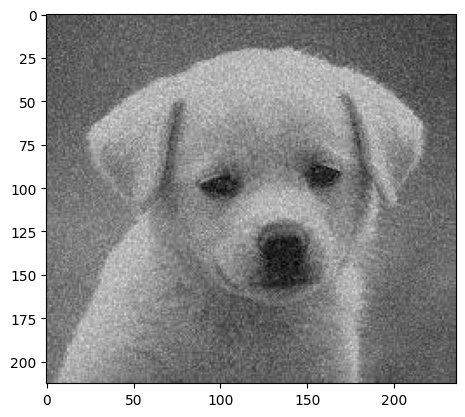

In [10]:
noisy_image = cv.imread('noisyimage.jpg')
plt.imshow(noisy_image)

In [25]:
# Check the shape of the image
print(f"Image dimensions: {noisy_image.shape}")

Image dimensions: (213, 236)


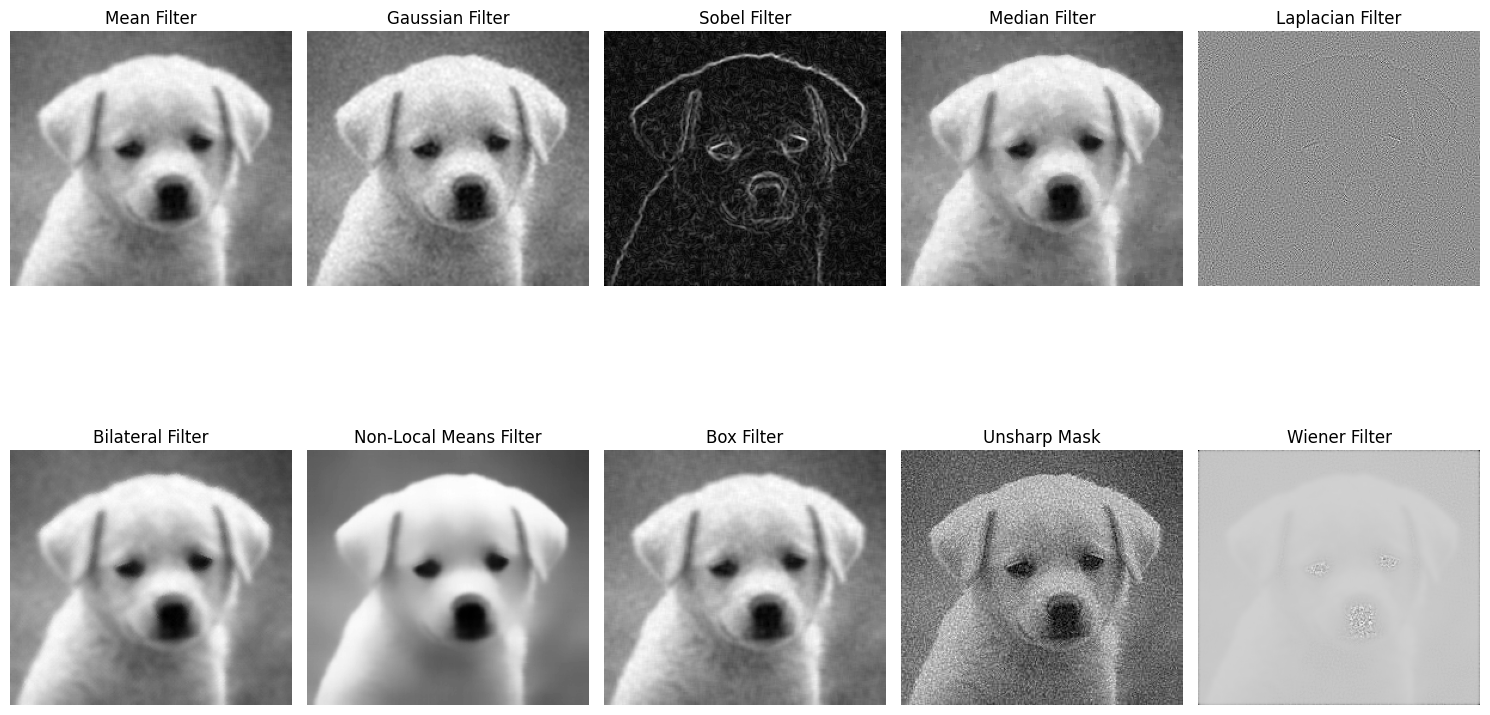

In [31]:
from scipy.signal import wiener
# Apply Mean Filtering
mean_filtered = cv.blur(noisy_image, (5, 5))

# Apply Gaussian Filter
gaussian_filtered = cv.GaussianBlur(noisy_image, (5, 5), 0)

# Apply Sobel Filter (both horizontal and vertical)
sobelx_filtered = cv.Sobel(noisy_image, cv.CV_64F, 1, 0, ksize=5)
sobely_filtered = cv.Sobel(noisy_image, cv.CV_64F, 0, 1, ksize=5)
sobel_filtered = cv.magnitude(sobelx_filtered, sobely_filtered)

# Apply Median Filter
median_filtered = cv.medianBlur(noisy_image, 5)

# Apply Laplacian Filter
laplacian_filtered = cv.Laplacian(noisy_image, cv.CV_64F)

# Apply Bilateral Filter
bilateral_filtered = cv.bilateralFilter(noisy_image, 9, 75, 75)

# Apply Non-Local Means Filtering
non_local_means_filtered = cv.fastNlMeansDenoising(noisy_image, None, 30, 7, 21)

# Apply Box Filter
box_filtered = cv.boxFilter(noisy_image, -1, (5, 5))

# Apply Unsharp Masking (enhancing edges while smoothing)
blurred = cv.GaussianBlur(noisy_image, (5, 5), 10)
unsharp_mask = cv.addWeighted(noisy_image, 1.5, blurred, -0.5, 0)

# Apply Wiener Filter
wiener_filtered = wiener(noisy_image, (5, 5))

# Display filtered images
filtered_images = [
    mean_filtered, gaussian_filtered, sobel_filtered,
    median_filtered, laplacian_filtered, bilateral_filtered,
    non_local_means_filtered, box_filtered, unsharp_mask,
    wiener_filtered
]

titles = [
    'Mean Filter', 'Gaussian Filter', 'Sobel Filter',
    'Median Filter', 'Laplacian Filter', 'Bilateral Filter',
    'Non-Local Means Filter', 'Box Filter', 'Unsharp Mask',
    'Wiener Filter'
]

fig, axs = plt.subplots(2, 5, figsize=(15, 10))
axs = axs.flatten()

for i, (img, title) in enumerate(zip(filtered_images, titles)):
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()


Q3. Measure the quality of the best output image using any 2 different Image quality measures and give your interpretation

In [43]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Choose the best output image for quality measurement
best_output_image = non_local_means_filtered 

# Compute PSNR
psnr_value = psnr(noisy_image, best_output_image)

# Compute SSIM, adjusting win_size if necessary
#win_size = min(noisy_image.shape[0], noisy_image.shape[1], 5)  # Ensure it's an odd number and fits the image size
ssim_value, _ = ssim(noisy_image, best_output_image, full=True)

print(f"PSNR: {psnr_value}")
print(f"SSIM: {ssim_value}")


PSNR: 24.921343481079127
SSIM: 0.3688930282002201


In [42]:
# Initialize lists to store PSNR and SSIM values
psnr_values = []
ssim_values = []

# Compute PSNR and SSIM for each filtered image
for img, title in zip(filtered_images, titles):
    # Ensure images are the same size and type
    if img.shape != noisy_image.shape:
        img = cv.resize(img, (noisy_image.shape[1], noisy_image.shape[0]))
    img = img.astype(np.uint8)
    
    # Compute PSNR
    psnr_value = psnr(noisy_image, img)
    psnr_values.append(psnr_value)
    
    # Compute SSIM
    #win_size = min(noisy_image.shape[0], noisy_image.shape[1], 5)  # Ensure it's an odd number
    ssim_value, _ = ssim(noisy_image, img, full=True)
    ssim_values.append(ssim_value)
    
    # Print PSNR and SSIM values
    print(f"{title} - PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f}")

# Find the index of the best image based on PSNR and SSIM
best_psnr_index = np.argmax(psnr_values)
best_ssim_index = np.argmax(ssim_values)

print(f"\nBest image based on PSNR: {titles[best_psnr_index]}")
print(f"Best image based on SSIM: {titles[best_ssim_index]}")

Mean Filter - PSNR: 25.27, SSIM: 0.4065
Gaussian Filter - PSNR: 26.43, SSIM: 0.5497
Sobel Filter - PSNR: 9.84, SSIM: 0.0102
Median Filter - PSNR: 25.29, SSIM: 0.4071
Laplacian Filter - PSNR: 8.79, SSIM: 0.1381
Bilateral Filter - PSNR: 25.53, SSIM: 0.4292
Non-Local Means Filter - PSNR: 24.92, SSIM: 0.3689
Box Filter - PSNR: 25.27, SSIM: 0.4065
Unsharp Mask - PSNR: 31.32, SSIM: 0.9383
Wiener Filter - PSNR: 18.96, SSIM: 0.0777

Best image based on PSNR: Unsharp Mask
Best image based on SSIM: Unsharp Mask


Interpretation:<br>
Image with the highest PSNR is considered as of good quality and image with SSIM value near to +1 is considered as of good quality.<br>
Here, according to PSNR value: unsharp masked image quality is better with value of 31.32(highest).<br>
And according to SSIM value: unsharp masked image is better with value of 0.9383(much closer to +1).<br>